In [1]:
import numpy as np

(10000, 10000)
3.254283e-05 0.9999685


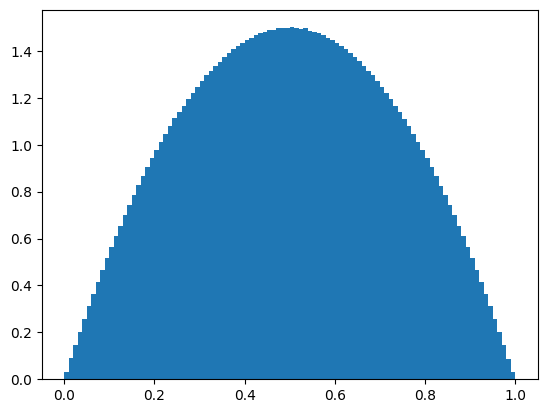

In [363]:
import numpy as np

N_PRODUCERS = 10_000
N_CONSUMERS = 10_000

# α<1 creates a heavy‐left tail (lots of tiny scores), β>1 pulls mass away from 1
alpha = 2
beta  = 2.0

# draws all at once in float32
rel_matrix = np.random.beta(alpha, beta, size=(N_CONSUMERS, N_PRODUCERS)).astype(np.float32)

print(rel_matrix.shape)   # (10000, 10000)
print(rel_matrix.min(), rel_matrix.max())

plt.hist(rel_matrix.flatten(), bins=100, density=True);


In [358]:
def load_profile(M):
    # sort per‐user, normalize, reverse
    order = np.argsort(M, axis=1)
    M = M[np.arange(M.shape[0])[:,None], order]
    M = M / M.max(axis=1, keepdims=True)
    M = M[:, ::-1]
    x = np.arange(M.shape[1]) / M.shape[1]
    return x, M.mean(axis=0), M.std(axis=0) / np.sqrt(M.shape[0])

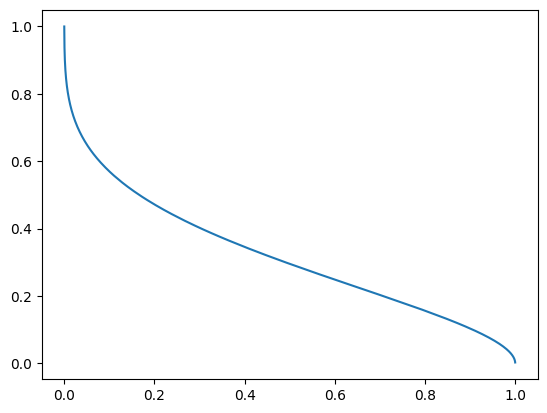

In [359]:
x, M_mean, M_std = load_profile(rel_matrix)
plt.plot(x, M_mean, label='mean')

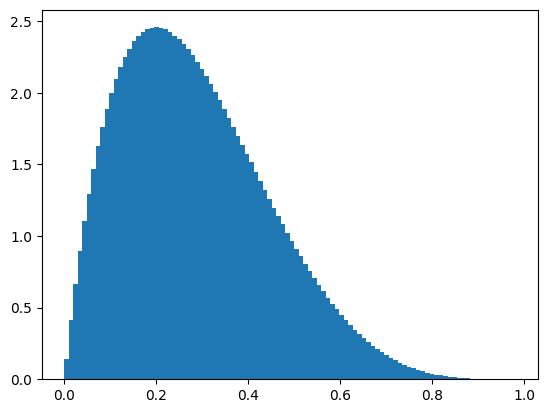

(array([1.000e+00, 2.000e+00, 1.000e+01, 1.600e+01, 4.400e+01, 9.200e+01,
        1.640e+02, 3.830e+02, 6.050e+02, 8.250e+02, 1.073e+03, 1.285e+03,
        1.286e+03, 1.242e+03, 1.020e+03, 7.240e+02, 5.280e+02, 3.450e+02,
        2.100e+02, 9.000e+01, 3.900e+01, 8.000e+00, 5.000e+00, 2.000e+00,
        1.000e+00]),
 array([0.61824632, 0.61866581, 0.61908531, 0.61950481, 0.61992431,
        0.62034374, 0.62076324, 0.62118274, 0.62160224, 0.62202173,
        0.62244123, 0.62286073, 0.62328023, 0.62369967, 0.62411916,
        0.62453866, 0.62495816, 0.62537766, 0.62579715, 0.62621665,
        0.62663615, 0.62705559, 0.62747508, 0.62789458, 0.62831408,
        0.62873358]),
 <BarContainer object of 25 artists>)

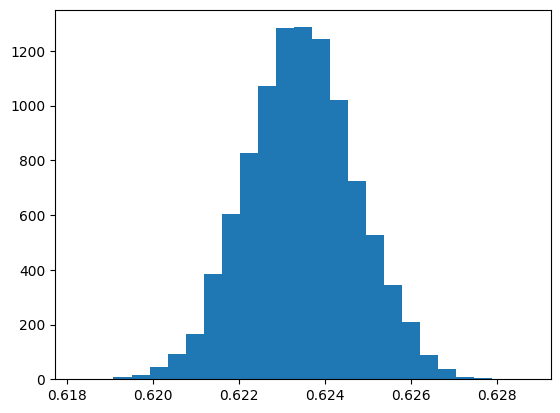

In [41]:
import matplotlib.pyplot as plt

plt.hist(rel_matrix.mean(axis=0), bins=25)

In [405]:
zipf_exponent = 3.5         # tweak this to make the tail heavier or lighter
ranks = np.arange(1, N_GROUPS+1)
group_weights = ranks**(-zipf_exponent)
group_probs = group_weights / group_weights.sum()

# 2) Sample one group per consumer
#    each consumer i gets group_ids[i] ∈ {0,…,14}
group_ids = np.random.choice(
    np.arange(N_GROUPS),
    size=N_CONSUMERS,
    p=group_probs
)

# 3) (Optional) look at the resulting group‐sizes
counts = np.bincount(group_ids, minlength=N_GROUPS)
print("Group\tProb\tCount")
for g, (p, c) in enumerate(zip(group_probs, counts)):
    print(f"{g:2d}\t{p:.4f}\t{c}")


Group	Prob	Count
 0	0.8919	8898
 1	0.0788	830
 2	0.0191	172
 3	0.0070	66
 4	0.0032	34


In [49]:
np.random.beta(5, beta, size=(3, 10)).astype(np.float32)

array([[0.53573453, 0.42312354, 0.16341387, 0.41032824, 0.4589003 ,
        0.69765383, 0.3869218 , 0.69503194, 0.33173493, 0.6227702 ],
       [0.28181392, 0.8296549 , 0.5122037 , 0.5287924 , 0.53036976,
        0.25757906, 0.52225846, 0.45392567, 0.4875711 , 0.6367571 ],
       [0.47520602, 0.4021214 , 0.5903459 , 0.41764688, 0.77571255,
        0.84333   , 0.67111266, 0.5849519 , 0.50805587, 0.5770377 ]],
      dtype=float32)

In [ ]:
alphas = np.linspace(1, N_GROUPS, N_GROUPS)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15.])

In [222]:
alphas = np.linspace(1, 0.01, N_GROUPS)

rel_matrix = np.zeros((N_CONSUMERS, N_PRODUCERS), dtype=np.float32)
for alpha, group_id in zip(alphas, range(N_GROUPS)):
    users = np.where(group_ids == group_id)[0]
    rel_matrix_group = np.random.beta(1, 1/alpha, size=(len(users), N_PRODUCERS)).astype(np.float32)
    rel_matrix[users] = rel_matrix_group

rel_matrix

array([[0.8337626 , 0.48087576, 0.30904323, ..., 0.7115015 , 0.03099713,
        0.90229905],
       [0.44492215, 0.2878576 , 0.22448866, ..., 0.12630033, 0.0744238 ,
        0.3538125 ],
       [0.34315336, 0.6968995 , 0.4944077 , ..., 0.07086605, 0.5268873 ,
        0.7346127 ],
       ...,
       [0.6802825 , 0.7120344 , 0.5986737 , ..., 0.7501762 , 0.38777786,
        0.5170733 ],
       [0.27284497, 0.3617249 , 0.18685086, ..., 0.36708468, 0.00560252,
        0.6656823 ],
       [0.8413904 , 0.13234398, 0.72516507, ..., 0.54295874, 0.4746257 ,
        0.36932907]], shape=(10000, 10000), dtype=float32)

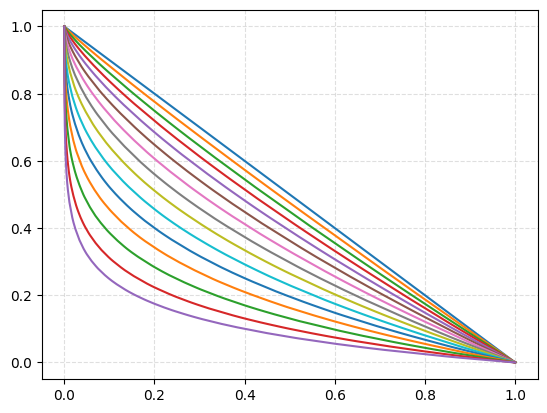

In [223]:
for group in range(N_GROUPS):
    group_ids_ = np.where(group_ids == group)[0]

    M = rel_matrix[group_ids_]

    order = np.argsort(M, axis=1)
    M = M[np.arange(M.shape[0])[:,None], order]
    M = M / M.max(axis=1, keepdims=True)
    M = M[:, ::-1]
    x = np.arange(M.shape[1]) / M.shape[1]
    plt.plot(x, M.mean(axis=0), label=f"Group {group}")
plt.grid(visible=True,linestyle="--", alpha=0.4)
#plt.legend()

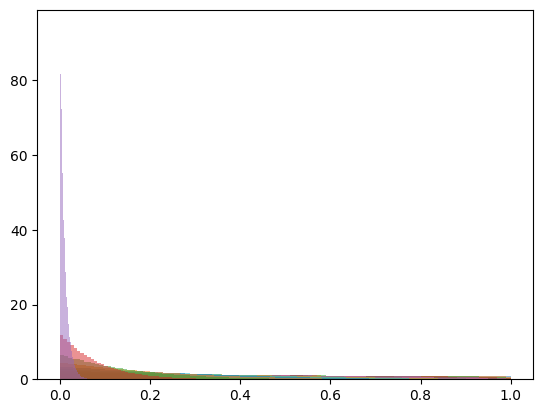

In [ ]:
for group in range(N_GROUPS):
    group_ids_ = np.where(group_ids == group)[0]
    M = rel_matrix[group_ids_]
    plt.hist(M.flatten(), bins=100, density=True, alpha=0.5, label=f"Group {group}")


In [407]:
# save the rel_matrix
np.save("simrec_predictions.npy", rel_matrix)

In [408]:
gas = []

for u, g in enumerate(group_ids):
    gas.append({"user_id": u, "top_category": str(g)})

import json
with open("simrec_user_groups.json", "w") as f:
    json.dump(gas, f, indent=2)

(array([1.35500003, 1.28500003, 1.28500003, 1.27250003, 1.25500026,
        1.2324998 , 1.2149998 , 1.19500025, 1.17250024, 1.15000024,
        1.1249994 , 1.10250023, 1.07500022, 1.04749944, 1.01750097,
        0.98749947, 0.94749949, 0.91250087, 0.86499954, 0.81500078,
        0.7524996 , 0.67749964, 0.57250055, 0.41499978, 0.26999986]),
 array([0.        , 0.04      , 0.08      , 0.12      , 0.16      ,
        0.19999999, 0.23999999, 0.28      , 0.31999999, 0.35999998,
        0.39999998, 0.44      , 0.47999999, 0.51999998, 0.56      ,
        0.59999996, 0.63999999, 0.68000001, 0.71999997, 0.75999999,
        0.79999995, 0.83999997, 0.88      , 0.91999996, 0.95999998,
        1.        ]),
 <BarContainer object of 25 artists>)

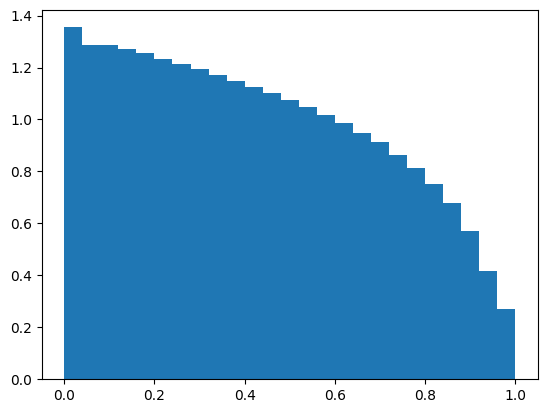

In [382]:
plt.hist(rel_matrix.mean(axis=0), density=True, bins=25)

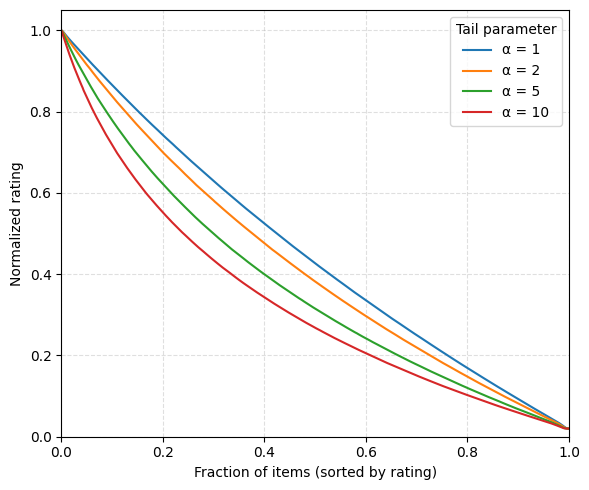

In [313]:
import numpy as np
import matplotlib.pyplot as plt

def sample_group_profiles(
    n_users:int,
    n_items:int,
    beta: float,
    eps:  float = 0.02,
    noise:float = 0.01
) -> np.ndarray:
    """
    Returns an array (n_users × n_items) of *sorted & normalized* profiles
    in [eps,1], whose mean curve is
        f(x) = eps + (1-eps)*(1 - log(1+beta*x)/log(1+beta))
    with per-user Gaussian jitter of scale `noise`.
    """
    # 1) analytic target curve on grid x_i = i / n_items
    x = np.arange(n_items) / float(n_items)
    base = 1 - np.log(1 + beta*x) / np.log(1 + beta)
    base = eps + (1 - eps)*base

    P = np.zeros((n_users, n_items))
    for u in range(n_users):
        # add a little jitter, then clip into [eps, 1]
        raw = np.clip(base + np.random.randn(n_items)*noise, eps, 1.0)

        # sort descending
        prof = np.sort(raw)[::-1]
        # normalize top → 1 (here prof[0] ≈1 already)
        prof /= prof[0]

        P[u] = prof
    return P

# parameters
alphas   = [1, 2, 5, 10]   # tail-heaviness: 1=uniform, larger=heavier
n_users  = 500
n_items  = 500

# fractions along x-axis
x = np.arange(n_items) / n_items

# simulate and compute mean + SEM for each alpha
mean_profiles = {}
sem_profiles  = {}

for α in alphas:
    prof = sample_group_profiles(n_users, n_items, α)
    mean_profiles[α] = prof.mean(axis=0)
    sem_profiles[α]  = prof.std(axis=0, ddof=1) / np.sqrt(n_users)

# plot
plt.figure(figsize=(6, 5))
for α in alphas:
    μ = mean_profiles[α]
    σ = sem_profiles[α]
    plt.plot(x, μ,      label=f"α = {α}")
    plt.fill_between(x, μ - σ, μ + σ, alpha=0.2)

plt.grid(True, linestyle="--", alpha=0.4)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.xlabel("Fraction of items (sorted by rating)")
plt.ylabel("Normalized rating")
plt.legend(title="Tail parameter")
plt.tight_layout()
plt.show()


In [385]:
import numpy as np

def generate_log_profiles(
    n_users:int,
    n_items:int,
    beta: float,
    eps:  float = 0.1,
    noise:float = 0.01
) -> np.ndarray:
    """
    Returns an array (n_users × n_items) of *sorted & normalized* profiles
    in [eps,1], whose mean curve is
        f(x) = eps + (1-eps)*(1 - log(1+beta*x)/log(1+beta))
    with per-user Gaussian jitter of scale `noise`.
    """
    # 1) analytic target curve on grid x_i = i / n_items
    x = np.arange(n_items) / float(n_items)
    base = 1 - np.log(1 + beta*x) / np.log(1 + beta)
    base = eps + (1 - eps)*base

    P = np.zeros((n_users, n_items))
    for u in range(n_users):
        # add a little jitter, then clip into [eps, 1]
        raw = np.clip(base + np.random.randn(n_items)*noise, eps, 1.0)

        # sort descending
        prof = np.sort(raw)[::-1]
        # normalize top → 1 (here prof[0] ≈1 already)
        prof /= prof[0]

        P[u] = prof
    return P

# example usage
n_users, n_items = 500, 500
betas = [10, 50, 200]

all_means = {}
all_sems  = {}
x = np.arange(n_items)/n_items

for β in betas:
    M = generate_log_profiles(n_users, n_items, β)
    all_means[β] = M.mean(axis=0)
    all_sems[β]  = M.std(axis=0, ddof=1)/np.sqrt(n_users)


In [ ]:
alphas = [0.1, 1, 10, 50, 100, 1000]
N_GROUPS = len(alphas)

rel_matrix = np.zeros((N_CONSUMERS, N_PRODUCERS), dtype=np.float32)
for alpha, group_id in zip(alphas, range(N_GROUPS)):
    users = np.where(group_ids == group_id)[0]
    rel_matrix_group = generate_log_profiles(len(users), N_PRODUCERS, alpha)
    rel_matrix[users] = rel_matrix_group

rel_matrix

array([[1. , 1. , 1. , ..., 0.1, 0.1, 0.1],
       [1. , 1. , 1. , ..., 0.1, 0.1, 0.1],
       [1. , 1. , 1. , ..., 0.1, 0.1, 0.1],
       ...,
       [1. , 1. , 1. , ..., 0.1, 0.1, 0.1],
       [1. , 1. , 1. , ..., 0.1, 0.1, 0.1],
       [1. , 1. , 1. , ..., 0.1, 0.1, 0.1]],
      shape=(10000, 10000), dtype=float32)

In [290]:
M = M[np.arange(M.shape[0])[:,None], order]

In [310]:
order = np.argsort(M, axis=1)

(array([1313., 1269., 1220., 1166., 1108., 1040.,  958.,  852.,  693.,
         381.]),
 array([0.10000482, 0.19000435, 0.28000385, 0.37000337, 0.4600029 ,
        0.55000246, 0.64000189, 0.73000145, 0.82000101, 0.91000044,
        1.        ]),
 <BarContainer object of 10 artists>)

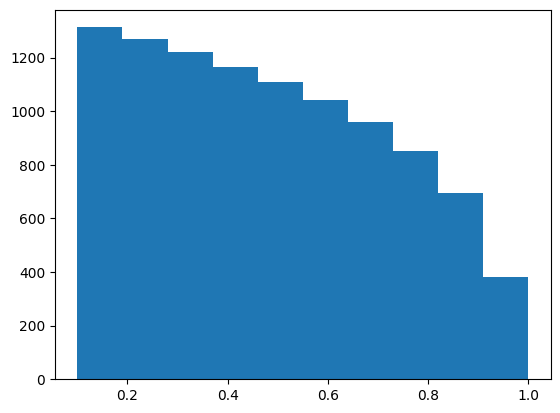

In [387]:
plt.hist(rel_matrix.mean(axis=0))

In [344]:
M = rel_matrix
order = np.argsort(M, axis=1)
M = M[np.arange(M.shape[0])[:,None], order]
M = M[:, ::-1]
M.mean(axis=0)

array([0.8681    , 0.86774504, 0.8672866 , ..., 0.08681381, 0.08681381,
       0.08681381], shape=(10000,), dtype=float32)

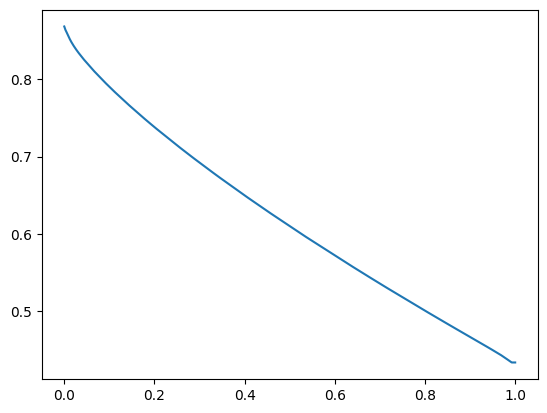

In [350]:
M = rel_matrix
order = np.argsort(M, axis=1)
M = M[np.arange(M.shape[0])[:,None], order]
M = M / 1
M = M[:, ::-1]
x = np.arange(M.shape[1]) / M.shape[1]
plt.plot(x, M.mean(axis=0), label=f"Group {group}")